# Summer 2022 Data Science Intern Challenge 

## Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [2]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
df['order_amount'].mean()

3145.128

<AxesSubplot:>

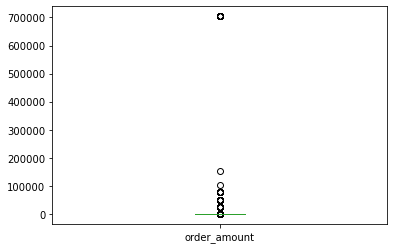

In [4]:
df['order_amount'].plot.box()

### Question 1a: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

There are multiple better ways to evaluate AOV due to the skew of the data. The code and following results are shown below

Median 

In [5]:
df['order_amount'].median()

284.0

Mean, excluding outliers outside of 3 standard deviations

In [6]:
ov_3stdev = df[(np.abs(stats.zscore(df['order_amount'])) < 3)]
ov_3stdev['order_amount'].mean()

723.2617422721798

Mean, excluding outliers outside of 1.5 IQR

In [7]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1

ov_iqr = df[(df['order_amount'] > (Q1 - 1.5 * IQR)) & (df['order_amount'] < (Q3 + 1.5 * IQR))]
ov_iqr['order_amount'].mean()

293.7153735336489

Median, excluding outliers outside of 1.5 IQR

In [8]:
ov_iqr['order_amount'].median()

280.0

Logarithmic mean

In [9]:
np.exp(np.log(df['order_amount']).mean())

285.0204747254945

### Question 1b: What metric would you report for this dataset?

For this metric I would report the median. This is due to two factors:
1. Reports an appropriate measure of central tendency similar to answer "Average Order Value", but adapts to a right-skewed distribution
2. Is easily interpretable summary statistic and is computationally efficient

### Question 1c: What is its value?

The value of the median for this dataset is 284

# Question 2: 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### How many orders were shipped by Speedy Express in total?

```
SELECT COUNT(*)
FROM Orders
WHERE ShipperID = (
	SELECT ShipperID
    FROM Shippers
    WHERE ShipperName = 'Speedy Express'
);
```

**54** orders were shipped by Speedy Express

### What is the last name of the employee with the most orders?

```
SELECT LastName
FROM Employees
JOIN (
    SELECT EmployeeID, COUNT(OrderID) AS Order_Count
    FROM Orders
    GROUP BY EmployeeID
) AS Employee_Orders ON Employee_Orders.EmployeeID = Employees.EmployeeID
ORDER BY Employee_Orders.Order_Count DESC LIMIT 1;
```

The last name of the employee with the most orders is '**Peacock**'

### What product was ordered the most by customers in Germany?

```
SELECT Products.ProductID, ProductName, SUM(Quantity) AS Total_Products
FROM Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID
INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.Country = 'Germany'
GROUP BY Products.ProductID
ORDER BY Total_Products DESC;
```

The product ordered most by customers in Germany is '**Boston Crab Meat**'